Importing the libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Reading the data

In [2]:
data = pd.read_csv("TheBeatlesCleaned.csv")
data

,id,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.2700,0.0665,0.971,173947
1,2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.7070,0.3090,0.882,108547
2,3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.6350,0.0601,0.835,177133
3,4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.6080,0.1290,0.929,145080
4,5,1963,Please Please Me,Boys,0.402,0.86,0.0504,0.6070,0.7360,0.822,146440
...,...,...,...,...,...,...,...,...,...,...,...
188,189,1970,Let It Be,ive got a feeling,0.440,0.609,0.0358,0.0715,0.5820,0.364,217560
189,190,1970,Let It Be,one after 909,0.554,0.828,0.0739,0.0307,0.9070,0.888,173960
190,191,1970,Let It Be,the long and winding road,0.299,0.329,0.0279,0.7560,0.0559,0.392,218187
191,192,1970,Let It Be,for you blue,0.880,0.556,0.0855,0.2400,0.2400,0.955,152213


In [3]:
#Checking for null values
data.isna().sum()

id              0
year            0
album           0
song            0
danceability    0
energy          0
speechiness     0
acousticness    0
liveness        0
valence         0
duration_ms     0
dtype: int64

In [4]:
#Checking the datatypes
data.dtypes

id                int64
year              int64
album            object
song             object
danceability    float64
energy           object
speechiness     float64
acousticness    float64
liveness        float64
valence         float64
duration_ms       int64
dtype: object

In [5]:
#Converting the datatype of energy to float

data['energy'] = data['energy'].str.replace(')','').astype(np.float64)


<ipython-input-5-797d4cf74409>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['energy'] = data['energy'].str.replace(')','').astype(np.float64)


In [6]:
x = data.iloc[:,4:11].values
x

array([[4.91000e-01, 8.01000e-01, 3.61000e-02, ..., 6.65000e-02,
        9.71000e-01, 1.73947e+05],
       [5.91000e-01, 6.05000e-01, 4.13000e-02, ..., 3.09000e-01,
        8.82000e-01, 1.08547e+05],
       [6.08000e-01, 5.65000e-01, 3.36000e-02, ..., 6.01000e-02,
        8.35000e-01, 1.77133e+05],
       ...,
       [2.99000e-01, 3.29000e-01, 2.79000e-02, ..., 5.59000e-02,
        3.92000e-01, 2.18187e+05],
       [8.80000e-01, 5.56000e-01, 8.55000e-02, ..., 2.40000e-01,
        9.55000e-01, 1.52213e+05],
       [7.61000e-01, 5.92000e-01, 5.86000e-02, ..., 6.10000e-01,
        3.32000e-01, 1.89387e+05]])

**Data Visualisation**

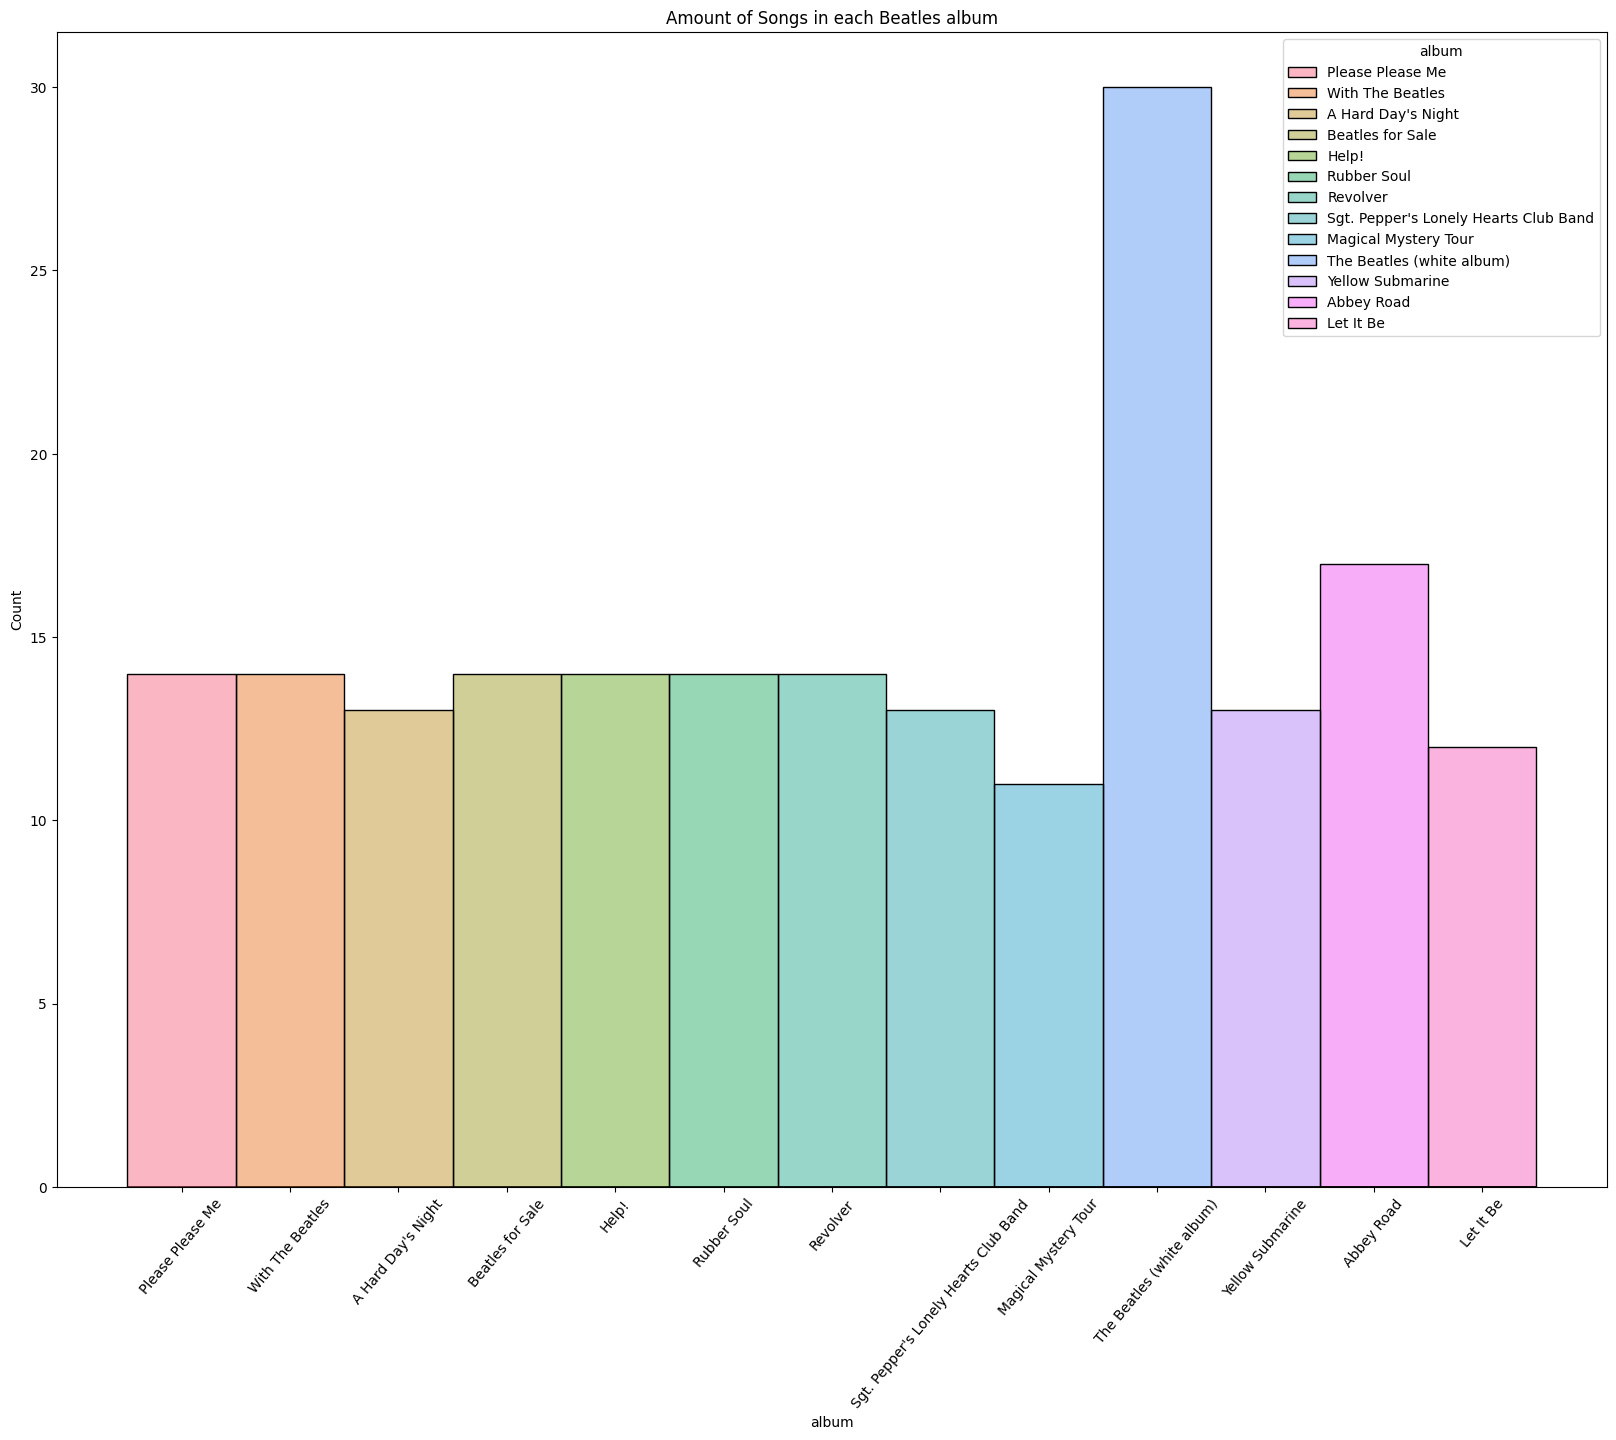

In [7]:
#Histogram of amount of songs in each Beatles album
plt.figure(figsize = (20,15))
hist = sns.histplot(data=data, x='album', hue='album', legend=True)
hist.set(title='Amount of Songs in each Beatles album')
plt.xticks(rotation=50)
plt.show()

<Figure size 2000x1500 with 0 Axes>

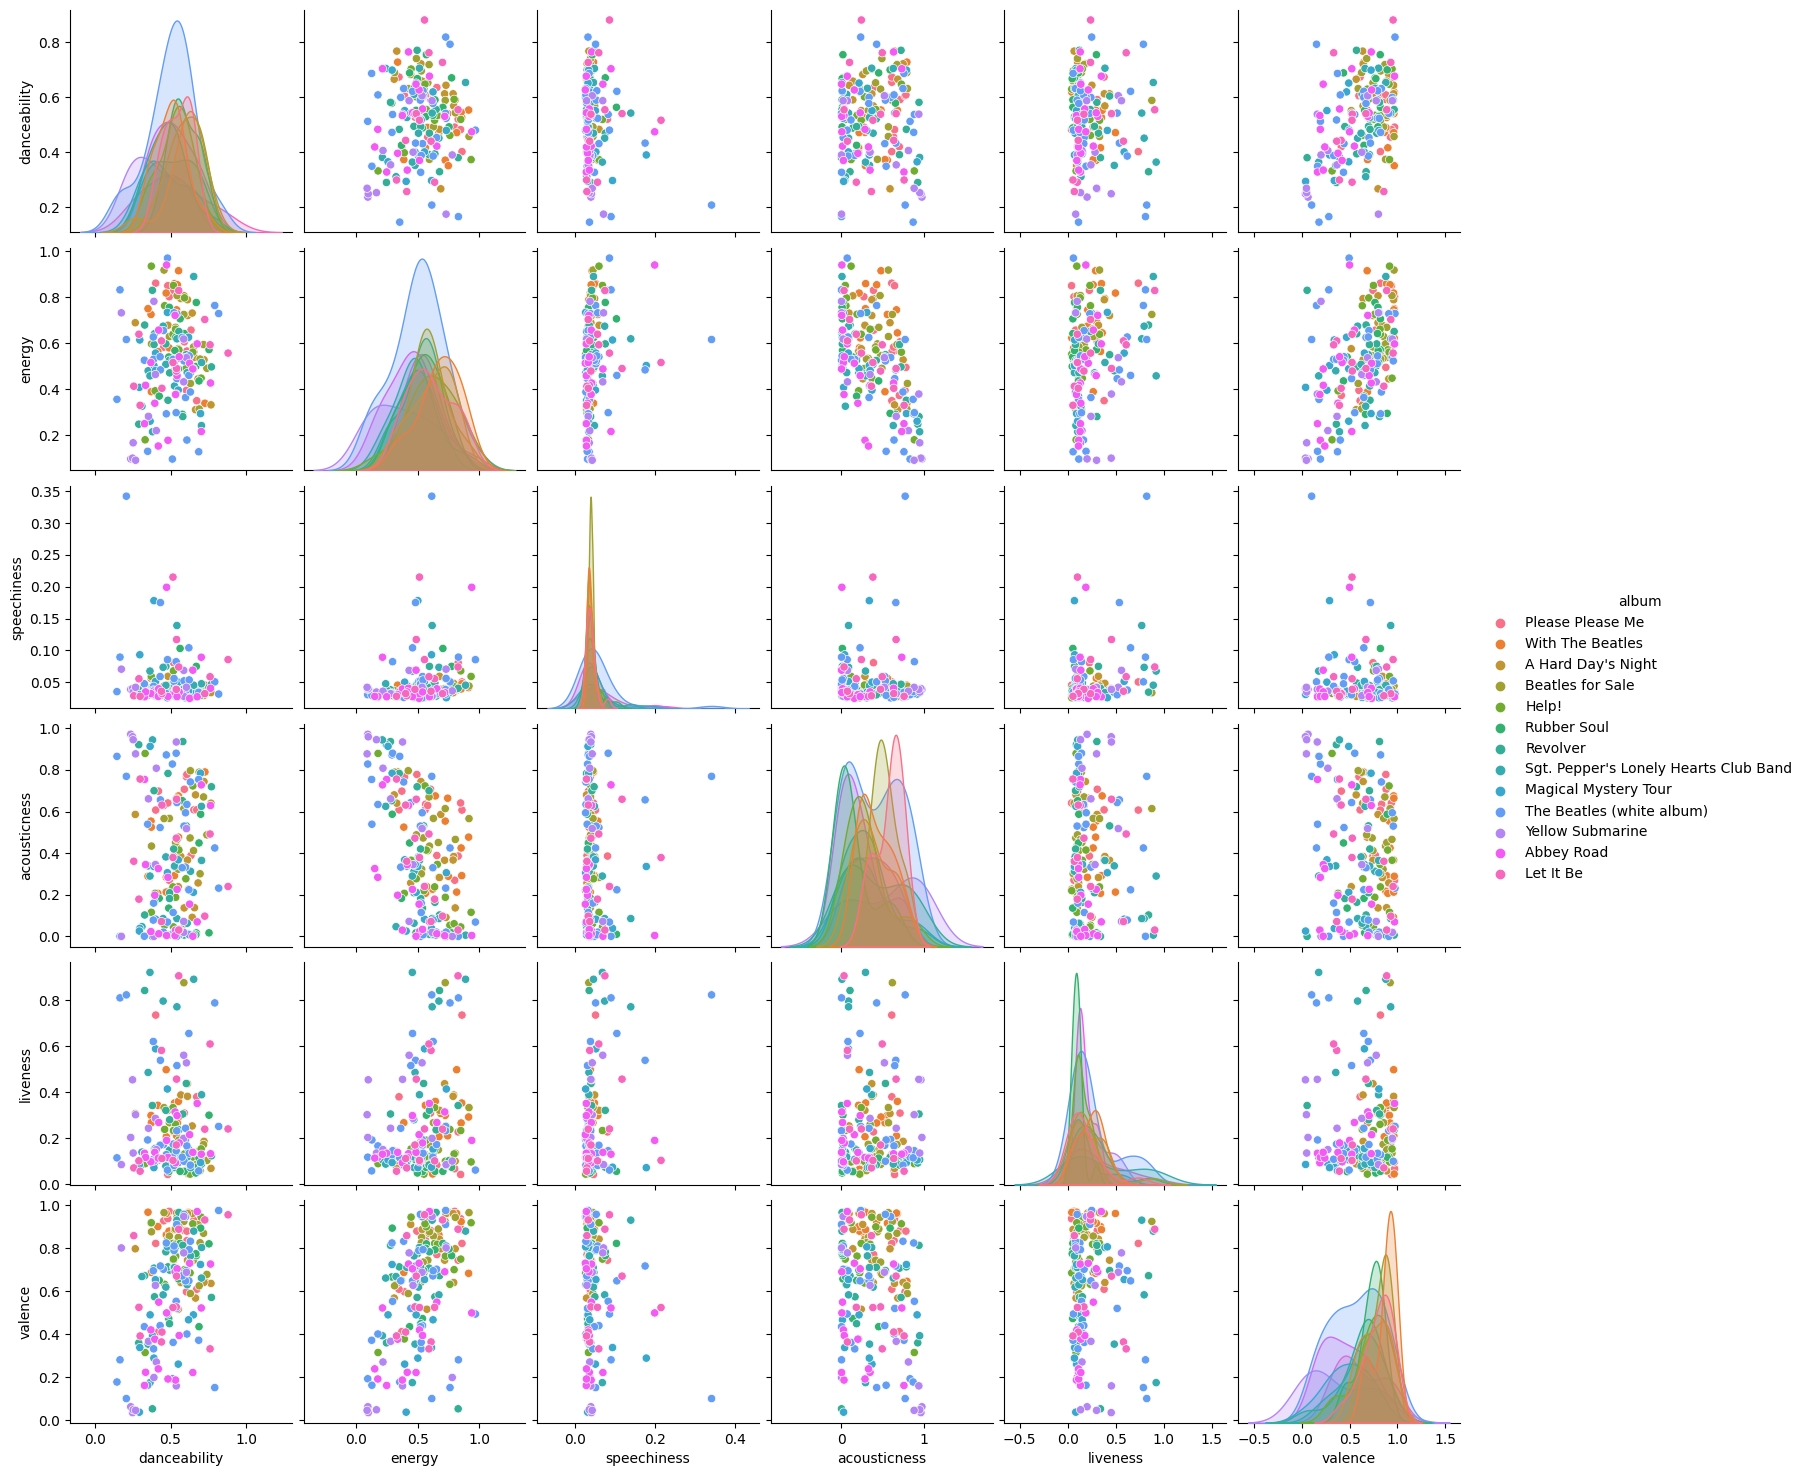

In [8]:
#Pairplot
plt.figure(figsize = (20,15))
p_plot = sns.pairplot(data=data[['album','danceability','energy','speechiness','acousticness','liveness','valence']], hue='album')
plt.show()

In [9]:
#Comparing factors using scatter plots
px.scatter(data,x='energy',y='valence',color='album',hover_data=['song','album','year'],title='Scatterplot of energy and valence')

In [10]:
px.scatter(data,x='energy',y='danceability',color='album',hover_data=['song','album','year'],title='Scatterplot of energy and danceability')

In [11]:
px.scatter(data,x='speechiness',y='liveness',color='album',hover_data=['song','album','year'],title='Scatterplot of speechiness and liveness')

In [12]:
px.scatter_3d(data,x='acousticness',y='energy',z='liveness',color='album',hover_data=['song','album','year'],title='Scatterplot of acousticness, energy and liveness')

In [13]:
variance = round(np.var(data[['danceability','energy','speechiness','acousticness','liveness','valence']]),3)
variance

danceability    0.019
energy          0.037
speechiness     0.001
acousticness    0.082
liveness        0.040
valence         0.063
dtype: float64

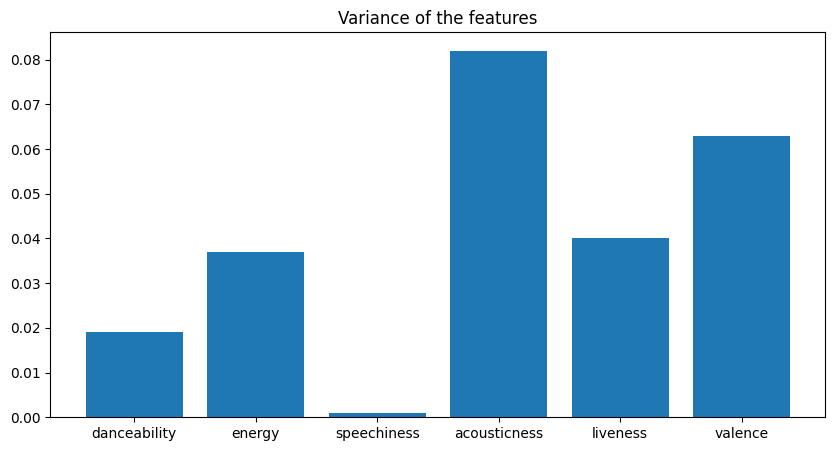

In [14]:
plt.figure(figsize = (10,5))
plt.bar(['danceability','energy','speechiness','acousticness','liveness','valence'],variance)
plt.title('Variance of the features' )
plt.show()

**Feature Scaling**

In [15]:
sc = StandardScaler()
x_1 = sc.fit_transform(x)

**Applying PCA**

In [16]:
pca = PCA(n_components = 2)
x_new = pca.fit_transform(x_1)

**Using the elbow method to find the optimal number of clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

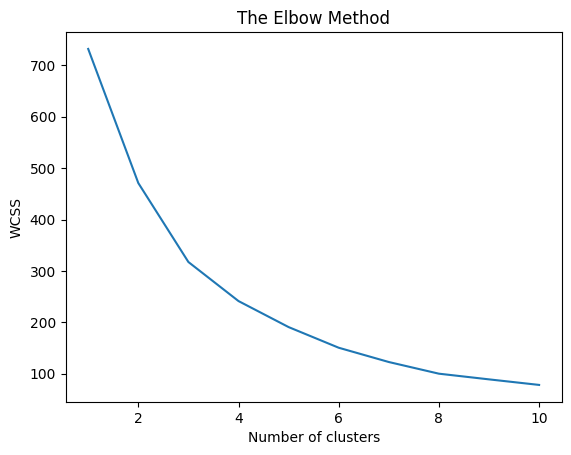

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_new)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



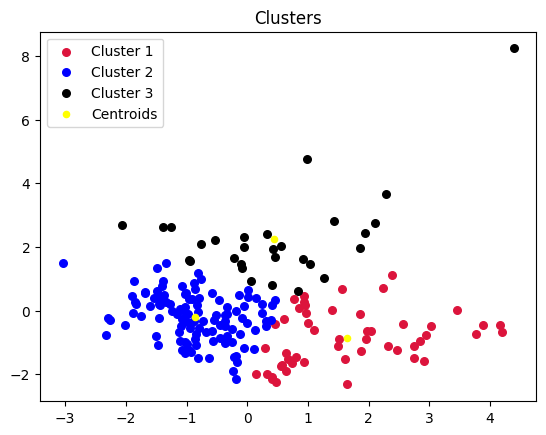

In [19]:
plt.scatter(x_new[y_kmeans == 0, 0], x_new[y_kmeans == 0, 1], s = 30, c = 'crimson', label = 'Cluster 1')
plt.scatter(x_new[y_kmeans == 1, 0], x_new[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(x_new[y_kmeans == 2, 0], x_new[y_kmeans == 2, 1], s = 30, c = 'black', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

**Recommending the most similar Beatles song based on the user's input song**

In [20]:
def song_recommendation(name):
    recommendation = []
    a = data.loc[data['song']==name][['acousticness','energy','liveness']]
    a = np.array(a).flatten()
    for num in data['id']:
        b = data.loc[data['id']==num][['acousticness','energy','liveness']]
        b = np.array(b).flatten()
        c = distance.euclidean(a,b)
        recommendation.append([data.loc[data['id']==num]['song'],c])
        recommendation.sort(key=lambda a: a[1])
    return recommendation[1]

In [21]:
songlist = []
for i in data['song']:
        songlist.append(i)
songlist

['I Saw Her Standing There',
 'Misery',
 'Anna',
 'Chains',
 'Boys',
 'Ask Me Why',
 'Please Please Me',
 'Love Me Do',
 'P.S. I Love You',
 "Baby It's You",
 'Do You Want to Know a Secret',
 'Taste of Honey',
 "There's a Place",
 'Twist and Shout',
 'It Wont Be Long',
 "All I've Got To Do",
 'All My Loving',
 'Don’t Bother Me',
 'Little Child',
 'Till There Was You',
 'Please Mister Postman',
 'Roll Over Beethoven',
 'Hold Me Tight',
 'You Really Got A Hold On Me',
 'I Wanna Be Your Man',
 'Devil In Her Heart',
 'Not A Second Time',
 'Money(That’s What I Want)',
 "A Hard Day's Night",
 'I should Have Known Better',
 'If I Fell',
 'Im Happy Just To Dance With You',
 'And I Love Her',
 'tell me why ',
 'cant buy me love',
 'any time at all',
 'ill cry instead',
 'things we said today',
 'when I get home',
 'you cant do that',
 'ill be back',
 'no reply',
 'im a loser',
 'babys in black',
 'rock and roll music',
 'ill follow the sun',
 'mr.moonlight',
 'kansas city/ Hey-Hey-Hey-Hey',
 'e

In [ ]:
print(song_recommendation('norwegian wood'))


In [ ]:
print(song_recommendation('helter skelter'))
